## 展示3D slicer 分割得到有标记CT

- 读取图像
- 获取图像信息
- 通过体素及像素点计算体积
- 可视化某一切片分割结果

In [1]:
# 导入所需包
import nibabel as nib
import matplotlib.pyplot as plt
import os
import numpy as np

In [4]:
# 加载原始图像
ori_file = 'C:/Users/DELL/Documents/2.nii.gz'
ori_loader = nib.load(ori_file)
ori_data = ori_loader.get_fdata()

# 读取label图像
label_file = 'C:/Users/DELL/Documents/2_1.nii.gz'
label_loader = nib.load(label_file)
label_data = label_loader.get_fdata()


# 获取体素，像素信息，用于计算脂肪体积

# 获取CT的体素信息，即一个像素点实际代表多少体积
voxel_dims = label_loader.header.get_zooms()

# 获取体素数据格式
voxel_dtype = label_loader.header.get_data_dtype()

# 获取图像像素信息
voxel_shape = label_loader.header.get_data_shape()

# Print the voxel information
print("体素(mm):", voxel_dims)
print("体素数据类型:", voxel_dtype)
print("像素:", voxel_shape)

体素(mm): (0.9765625, 0.9765625, 4.0)
体素数据类型: uint8
像素: (512, 512, 64)


In [5]:
# 分别计算VAT/SAT比值，以及VAT和SAT的体积

# 统计各自有多少个像素点，1为sat，2为vat
sat_cnt = np.count_nonzero(label_data==1)
vat_cnt = np.count_nonzero(label_data==2)

#  sat和vat的比值
sat_vat_ratio = sat_cnt/vat_cnt

# 各自计算vat和sat的体积，单位立方厘米
sat_volume = sat_cnt * np.prod(voxel_dims)
vat_volume = vat_cnt * np.prod(voxel_dims)

sat_volume = sat_volume/1000
vat_volume = vat_volume/1000

print("皮下脂肪体积: ",sat_volume," cm²")
print("内脏脂肪体积: ",vat_volume," cm²")
print("皮下脂肪/内脏脂肪: ",sat_vat_ratio)

皮下脂肪体积:  0.0  cm²
内脏脂肪体积:  6034.797668457031  cm²
皮下脂肪/内脏脂肪:  0.0


In [8]:
# 选择要查看的切片的索引
slice_index = 40  # 这里选择第层切片

# 提取指定层的切片数据
# [] 内分别表示，xyz三个方向的数组，下句表示，取x所有，y所有，z第slice_index的数据，即一个二维数组
slice_label_data = label_data[:, :, slice_index]
slice_ori_data = ori_data[:,:,slice_index]

# 打印切片数据的数值，查看二维数组某一行的数据
print("切片数值:")
print(slice_label_data[400])

切片数值:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

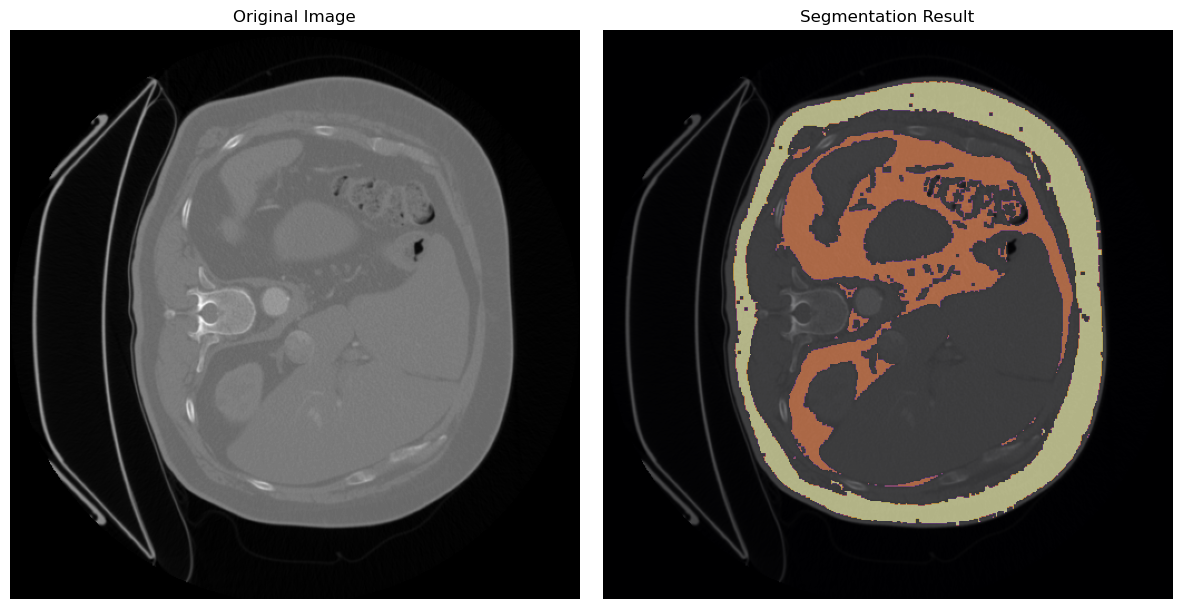

In [9]:
# 绘图

# 创建一个包含两张子图的图像
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# 绘制原始图像
ax1.imshow(slice_ori_data, cmap='gray') # 用灰度来展示原始图
ax1.set_title('Original Image')
ax1.axis('off')

# 绘制高亮分割图像

ax2.imshow(slice_label_data, cmap='inferno') # 用 彩色来展示标注图
ax2.imshow(slice_ori_data, cmap='gray', alpha=0.5)
ax2.set_title('Segmentation Result')
ax2.axis('off')

# 调整子图间的间距
plt.tight_layout()

# 保存图片
# plt.savefig("1.png",dpi=900)

# 显示图像
plt.show()